In [1]:
import sqlite3
import pandas as pd
import math
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib as plt

In [2]:
connection = sqlite3.connect('Northwind_small.sqlite')
cursor = connection.cursor()

In [3]:
def sql_select_to_df(SQL_COMMAND, cursor=cursor):
    """returns output of SQL command in dataframe format"""
    results = cursor.execute(SQL_COMMAND).fetchall()
    df = pd.DataFrame(results)
    df.columns = [i[0] for i in cursor.description]
    return df

In [4]:
orderDetail_df = sql_select_to_df("""select * from OrderDetail;""")
#orderDetail_df = orderDetail_df.iloc[:,-2:]
orderDetail_df.groupby('Discount').Quantity.mean()

Discount
0.00    21.715262
0.01     2.000000
0.02     2.000000
0.03     1.666667
0.04     1.000000
0.05    28.010811
0.06     2.000000
0.10    25.236994
0.15    28.382166
0.20    27.024845
0.25    28.240260
Name: Quantity, dtype: float64

In [5]:
orderDetail_df#.groupby('Discount').Quantity.mean()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.00
1,10248/42,10248,42,9.80,10,0.00
2,10248/72,10248,72,34.80,5,0.00
3,10249/14,10249,14,18.60,9,0.00
4,10249/51,10249,51,42.40,40,0.00
5,10250/41,10250,41,7.70,10,0.00
6,10250/51,10250,51,42.40,35,0.15
7,10250/65,10250,65,16.80,15,0.15
8,10251/22,10251,22,16.80,6,0.05
9,10251/57,10251,57,15.60,15,0.05


In [6]:
revenues = orderDetail_df.Quantity.values * orderDetail_df.UnitPrice.values
orderDetail_df['Revenue'] = revenues

discounts = list(orderDetail_df.Discount.values)

def get_discount_multiplier(discount):
    newlist = []
    
    for d in discount:
        newlist.append(1-d)
    
    return newlist

discount_multipliers = get_discount_multiplier(discounts)
discount_multipliers
orderDetail_df['DiscountMultipliers'] = discount_multipliers

orderDetail_df['DiscountedPrice'] = orderDetail_df.UnitPrice.values * orderDetail_df.DiscountMultipliers.values
orderDetail_df['Revenue_final'] = orderDetail_df.DiscountedPrice.values * orderDetail_df.Quantity.values

orderDetail_df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Revenue,DiscountMultipliers,DiscountedPrice,Revenue_final
0,10248/11,10248,11,14.00,12,0.00,168.00,1.00,14.0000,168.0000
1,10248/42,10248,42,9.80,10,0.00,98.00,1.00,9.8000,98.0000
2,10248/72,10248,72,34.80,5,0.00,174.00,1.00,34.8000,174.0000
3,10249/14,10249,14,18.60,9,0.00,167.40,1.00,18.6000,167.4000
4,10249/51,10249,51,42.40,40,0.00,1696.00,1.00,42.4000,1696.0000
5,10250/41,10250,41,7.70,10,0.00,77.00,1.00,7.7000,77.0000
6,10250/51,10250,51,42.40,35,0.15,1484.00,0.85,36.0400,1261.4000
7,10250/65,10250,65,16.80,15,0.15,252.00,0.85,14.2800,214.2000
8,10251/22,10251,22,16.80,6,0.05,100.80,0.95,15.9600,95.7600
9,10251/57,10251,57,15.60,15,0.05,234.00,0.95,14.8200,222.3000


In [53]:
orderDetail_df_no_discount = orderDetail_df.loc[orderDetail_df['Discount']==0]
orderDetail_df_5discount = orderDetail_df.loc[orderDetail_df['Discount']==0.05]
orderDetail_df_10discount = orderDetail_df.loc[orderDetail_df['Discount']==0.10]
orderDetail_df_15discount = orderDetail_df.loc[orderDetail_df['Discount']==0.15]
orderDetail_df_20discount = orderDetail_df.loc[orderDetail_df['Discount']==0.20]
orderDetail_df_25discount = orderDetail_df.loc[orderDetail_df['Discount']==0.25]


no_discount_final_revenues = orderDetail_df_no_discount.Revenue_final.values
pct5_discount_final_revenues = orderDetail_df_5discount.Revenue_final.values  
pct10_discount_final_revenues = orderDetail_df_10discount.Revenue_final.values  
pct15_discount_final_revenues = orderDetail_df_15discount.Revenue_final.values
pct20_discount_final_revenues = orderDetail_df_20discount.Revenue_final.values
pct25_discount_final_revenues = orderDetail_df_25discount.Revenue_final.values

In [54]:
def one_sample_ttest(sample_data, population_data, alpha):
    
    #Population mean
    mu_calc_figures = []
        
    for p in population_data:
        mu_calc_figures.append(p)
        
    mu = sum(mu_calc_figures)/len(mu_calc_figures)
    
    x_bar = sum(sample_data)/len(sample_data)
    
    #Sigma
    sample_data_arr = np.asarray(sample_data)
    sigma = np.std(sample_data_arr)
    
    #Degrees of Freedom
    df = len(sample_data) -1
    
    #Sample size
    n = len(sample_data)
    
    #Critical t value
    t_crit_positive = stats.t.ppf(1 - alpha, df=df)
    t_crit_negative = t_crit_positive * -1
    
    #T statistic
    t_stat_numerator = x_bar - mu
    t_stat_denominator = sigma/math.sqrt(n)
    t_stat = t_stat_numerator/t_stat_denominator
    
    if int(t_stat*100) in range(int(t_crit_negative*100), int(t_crit_positive*100)):
        return 'fail to reject the null hypothesis'
    elif int(t_stat*100) < int(t_crit_negative*100):
        return 'reject the null hypothesis. Sample mean is significantly less than population mean'
    elif int(t_stat*100) > int(t_crit_positive*100):
        return 'reject the null hypothesis. Sample mean is significantly greater than population mean'
    print(t_stat)

In [61]:
print(one_sample_ttest(no_discount_final_revenues, pct5_discount_final_revenues, 0.05))
print(one_sample_ttest(no_discount_final_revenues, pct10_discount_final_revenues, 0.05))
print(one_sample_ttest(no_discount_final_revenues, pct15_discount_final_revenues, 0.05))
print(one_sample_ttest(no_discount_final_revenues, pct20_discount_final_revenues, 0.05))
print(one_sample_ttest(no_discount_final_revenues, pct25_discount_final_revenues, 0.05))
print(one_sample_ttest(pct5_discount_final_revenues, pct25_discount_final_revenues, 0.05))

reject the null hypothesis. Sample mean is significantly less than population mean
fail to reject the null hypothesis
fail to reject the null hypothesis
fail to reject the null hypothesis
reject the null hypothesis. Sample mean is significantly less than population mean
fail to reject the null hypothesis


In [42]:
orderDetail_df.groupby('Discount').Quantity.mean()

Discount
0.00    21.715262
0.01     2.000000
0.02     2.000000
0.03     1.666667
0.04     1.000000
0.05    28.010811
0.06     2.000000
0.10    25.236994
0.15    28.382166
0.20    27.024845
0.25    28.240260
Name: Quantity, dtype: float64

In [43]:
orderDetail_df.groupby('Discount').DiscountedPrice.mean()

Discount
0.00    26.171534
0.01    14.850000
0.02    18.130000
0.03    23.910500
0.04    77.760000
0.05    29.256508
0.06    31.960000
0.10    22.654405
0.15    19.529535
0.20    18.821416
0.25    21.160812
Name: DiscountedPrice, dtype: float64

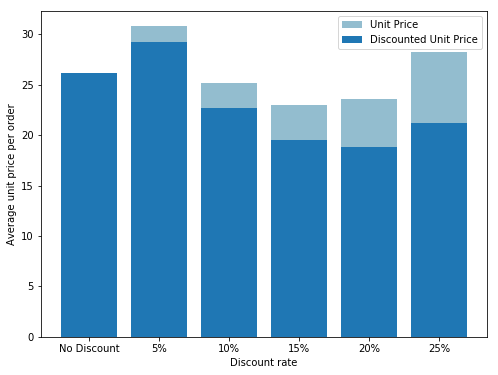

In [37]:
discounts = ['No Discount','5%','10%','15%','20%','25%']
unit_price = [26.171534, 30.796324, 25.171561, 22.975924, 23.526770, 28.214416]
discounted_unit_price = [26.171534, 29.256508, 22.654405, 19.529535, 18.821416, 21.160812]

ypos = np.arange(len(discounts))
plt.pyplot.figure(figsize = [8,6])
plt.pyplot.ylabel("Average unit price per order")
plt.pyplot.xlabel("Discount rate")
plt.pyplot.xticks(ypos,discounts)
plt.pyplot.bar(ypos,unit_price, label = 'Unit Price',color= '#93BDCF')
plt.pyplot.bar(ypos,discounted_unit_price, label = 'Discounted Unit Price')
plt.pyplot.legend()

In [39]:
i=0
while i < len(unit_price):
    diff = unit_price[i] - discounted_unit_price[i]
    print(diff)
    i+=1

0.0
1.5398159999999983
2.517156
3.446389
4.705354
7.053604


In [41]:
orderDetail_df.groupby('Discount').DiscountedPrice.mean()

Discount
0.00    26.171534
0.01    14.850000
0.02    18.130000
0.03    23.910500
0.04    77.760000
0.05    29.256508
0.06    31.960000
0.10    22.654405
0.15    19.529535
0.20    18.821416
0.25    21.160812
Name: DiscountedPrice, dtype: float64

In [40]:
gross_revenue_series = orderDetail_df.groupby('Discount').Revenue_final.mean()
gross_revenue = list(gross_revenue_series.values)
#gross_revenue
gross_revenue_series

Discount
0.00    570.006538
0.01     29.700000
0.02     29.890000
0.03     40.303500
0.04     77.760000
0.05    797.931754
0.06     63.920000
0.10    528.896757
0.15    557.364166
0.20    553.919901
0.25    642.458231
Name: Revenue_final, dtype: float64

<BarContainer object of 6 artists>

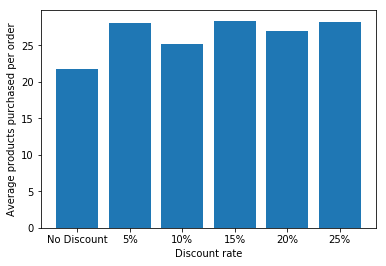

In [10]:
discounts = ['No Discount','5%','10%','15%','20%','25%']
quantities = [21.715262, 28.010811, 25.236994, 28.382166, 27.023845, 28.240260]

ypos = np.arange(len(discounts))
plt.pyplot.ylabel("Average products purchased per order")
plt.pyplot.xlabel("Discount rate")
#plt.pyplot.title("")
plt.pyplot.xticks(ypos,discounts)
plt.pyplot.bar(ypos,quantities)

<BarContainer object of 6 artists>

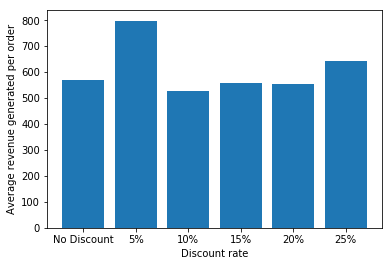

In [11]:
discounts = ['No Discount','5%','10%','15%','20%','25%']
revenue = [570.00, 797.93, 528.90, 557.36, 553.92, 642.46]

ypos = np.arange(len(discounts))
plt.pyplot.ylabel("Average revenue generated per order")
plt.pyplot.xlabel("Discount rate")
plt.pyplot.xticks(ypos,discounts)
#plt.pyplot.figure(figsize = [10,15])
plt.pyplot.bar(ypos,revenue)

In [15]:
for r in revenue:
    print(r-revenue[0])

0.0
227.92999999999995
-41.10000000000002
-12.639999999999986
-16.08000000000004
72.46000000000004


<BarContainer object of 6 artists>

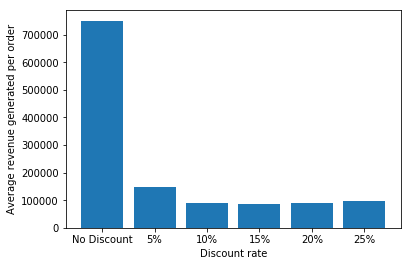

In [12]:
discounts = ['No Discount','5%','10%','15%','20%','25%']
revenue = [570.00, 797.93, 528.90, 557.36, 553.92, 642.46]
gross_revenue = [750698.61,147617.3745, 91499.1390, 87506.1740, 89181.1040, 98938.5675]

ypos = np.arange(len(gross_revenue))
plt.pyplot.ylabel("Average revenue generated per order")
plt.pyplot.xlabel("Discount rate")
plt.pyplot.xticks(ypos,discounts)
#plt.pyplot.figure(figsize = [10,15])
plt.pyplot.bar(ypos,gross_revenue)